<a href="https://colab.research.google.com/github/madhurapi/Power-BI-Projects/blob/main/India_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/India Trade/2010_2021_HS2_export.csv')
df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010


In [ ]:
# The data is in tidy format, meaning there is one observation per category.

# Column	Definition
# HSCode	Harmonized System (HS2) Code
# Commodity	Name of commodity as per HS2
# Country	Country of export
# Year	Year of export
# Value	Value of export (in million US$)

In [ ]:
df.isnull().sum()

HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

In [ ]:
df.shape

(184755, 5)

In [ ]:
df.HSCode.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38,
       39, 40, 42, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78,
       81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 98, 99,
       36, 26, 31, 46, 47, 80, 41, 93, 89,  1, 45, 79, 43])

In [ ]:
df.Commodity.unique()

array(['MEAT AND EDIBLE MEAT OFFAL.',
       'FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.',
       "DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",
       'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
       'LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.',
       'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.',
       'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.',
       'COFFEE, TEA, MATE AND SPICES.', 'CEREALS.',
       'PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.',
       'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.',
       'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.',
       'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.',
       'ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2692503040>]],
      dtype=object)

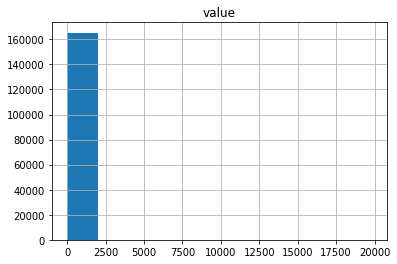

In [ ]:
df.hist('value')

In [ ]:
df1 = df.groupby(['Commodity'], as_index=False)['value'].mean()

In [ ]:
df1

,Commodity,value
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",30.460019
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,1.850896
2,ALUMINIUM AND ARTICLES THEREOF.,21.691791
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,7.553074
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,1.738757
...,...,...
93,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",2.526697
94,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,2.279161
95,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",1.960775
96,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,1.369679


In [ ]:
%pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

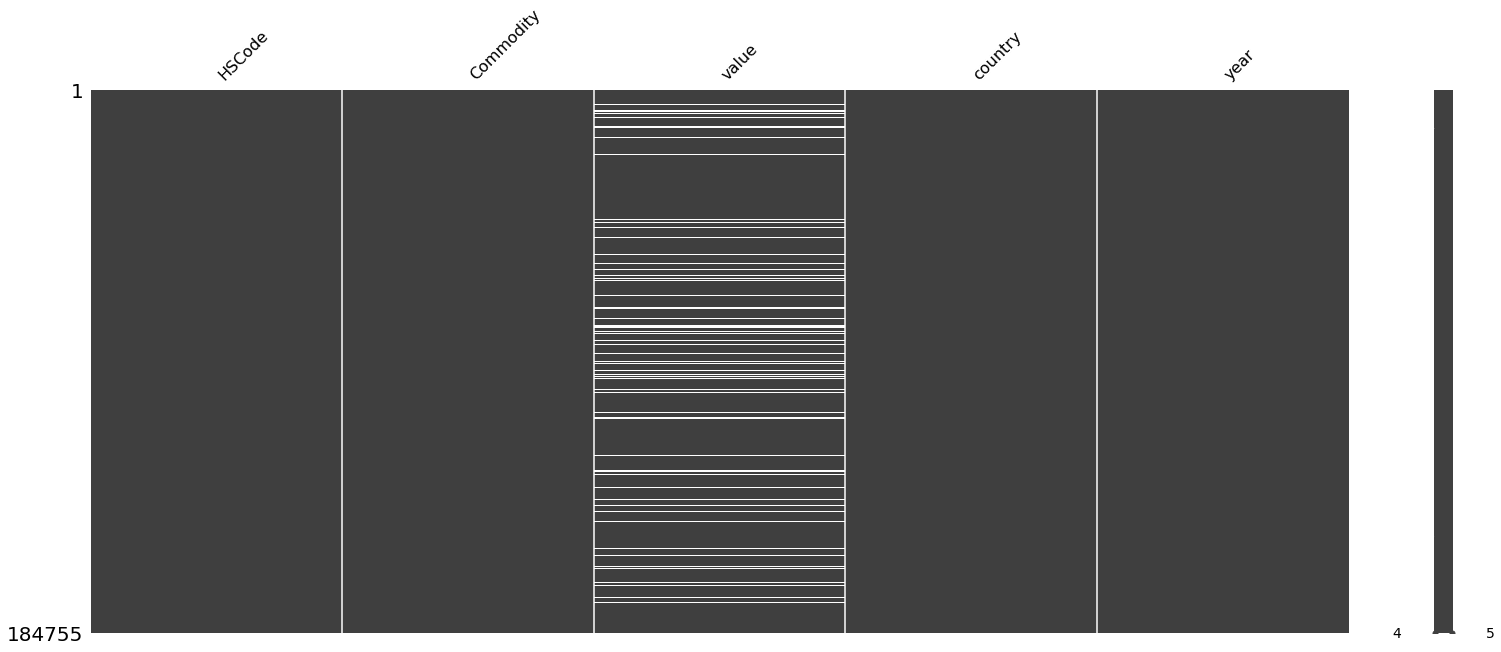

In [ ]:
msno.matrix(df)

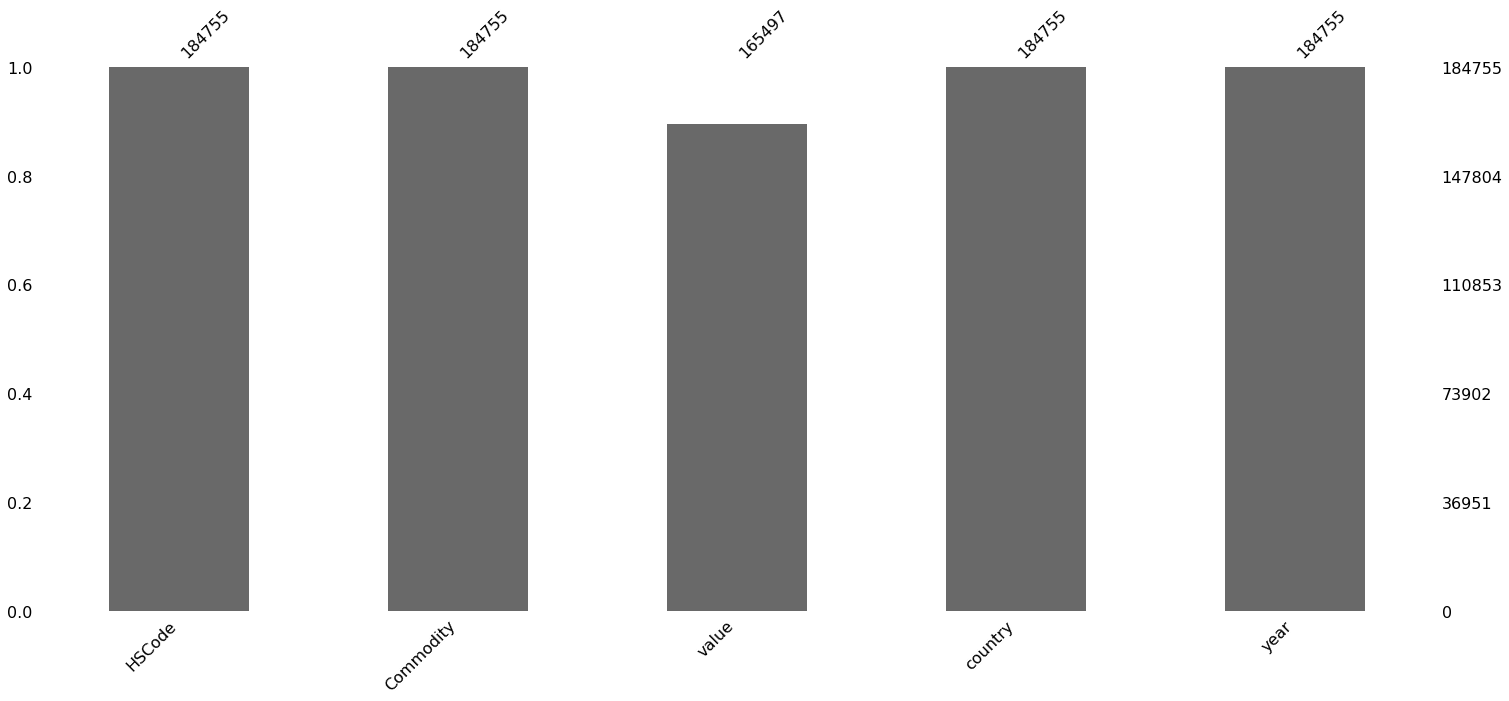

In [ ]:
msno.bar(df)

In [ ]:
import matplotlib as plt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn

In [ ]:
%matplotlib inline

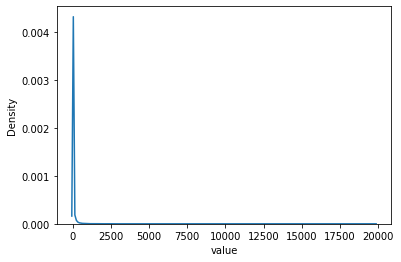

In [ ]:
seaborn.kdeplot(data = df, x ='value')

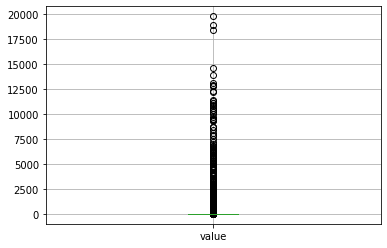

In [ ]:
df.boxplot('value')

In [ ]:
df1 = df[['value']]
df1.head()

,value
0,1.40
1,0.08
2,3.89
3,NaN
4,NaN


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors =2)
df1 = imputer.fit_transform(df1)

In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1.head()

,0
0,1.400000
1,0.080000
2,3.890000
3,22.233844
4,22.233844


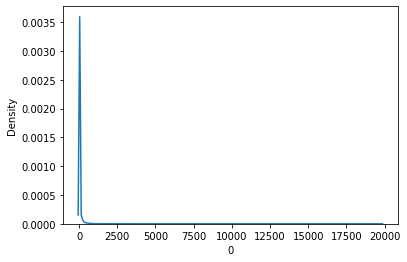

In [ ]:
seaborn.kdeplot(data = df1, x =0)

In [ ]:
df1.isnull().sum()

0    0
dtype: int64

In [ ]:
df1.rename(columns = {0:'value'}, inplace = True)

In [ ]:
df =df.drop(['value'], axis =1)

In [ ]:
df3 = pd.concat((df,df1),axis =1)

In [ ]:
df3.isnull().sum()

HSCode       0
Commodity    0
country      0
year         0
value        0
dtype: int64

In [ ]:
df3.to_csv('India_Export_2010-21.csv')